## 로지스틱 회귀
- 회귀가 아니라 분류임

### 로지스틱 함수 확인

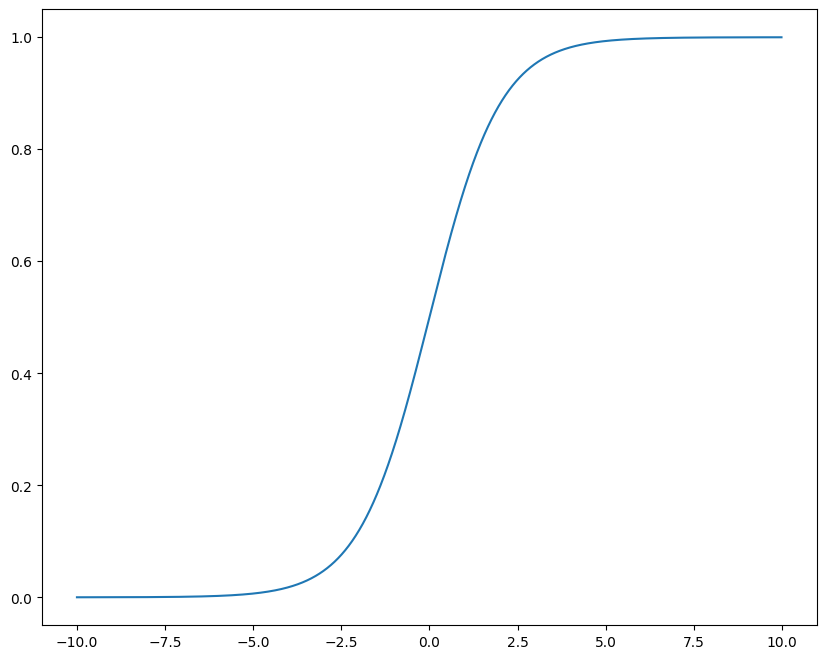

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.arange(-10, 10, 0.01)
g = 1/ (1+np.exp(-z))

plt.figure(figsize=(10,8))
plt.plot(z, g)
plt.show()

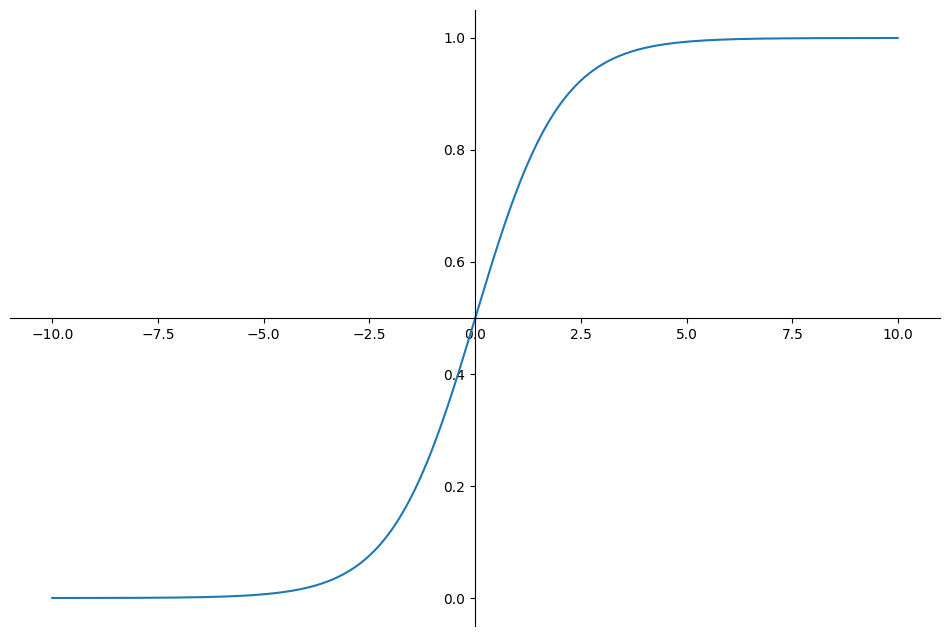

In [8]:
plt.figure(figsize=(12, 8))
ax = plt.gca()

ax.plot(z, g)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('None')

plt.show()

### cost function

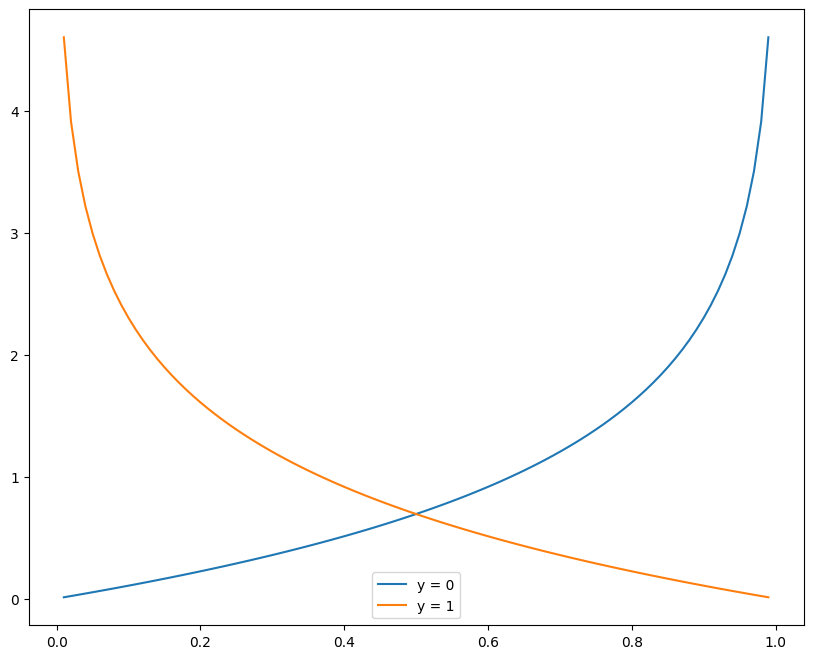

In [9]:
h = np.arange(0.01, 1, 0.01)

c0 = -np.log(1-h)
c1 = -np.log(h)

plt.figure(figsize=(10,8))
plt.plot(h, c0, label = 'y = 0')
plt.plot(h, c1, label = 'y = 1')
plt.legend()

plt.show()

### 와인 데이터

In [10]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0) ## 인덱스는 0번째 컬럼으로 하겠다
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
wine['taste'] = [1. if grade>5 else 0 for grade in wine['quality']]

x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

### 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

tr_dt, te_dt, tr_lb, te_lb = train_test_split(x, y ,test_size= 0.2, random_state=13)

### 초간단 로지스틱 회귀 테스트

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(tr_dt, tr_lb)

pred_tr = lr.predict(tr_dt)
pred_te = lr.predict(te_dt)

print(' tr ac : ', accuracy_score(tr_lb, pred_tr))
print('te ac : ', accuracy_score(te_lb, pred_te))

 tr ac :  0.7427361939580527
te ac :  0.7438461538461538


### 파이프라인 구축

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)

In [15]:
pipe.fit(tr_dt, tr_lb)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [16]:
pred_tr = pipe.predict(tr_dt)
pred_te = pipe.predict(te_dt)

print('train acc : ', accuracy_score(tr_lb, pred_tr))
print('test acc : ', accuracy_score(te_lb, pred_te))

train acc :  0.7444679622859341
test acc :  0.7469230769230769


### decision tree 와의 비교

In [17]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(tr_dt, tr_lb)

models = {'logistic regresstion' : pipe, 'decision tree':wine_tree}

### auc 그래프를 이용한 모델간 비교

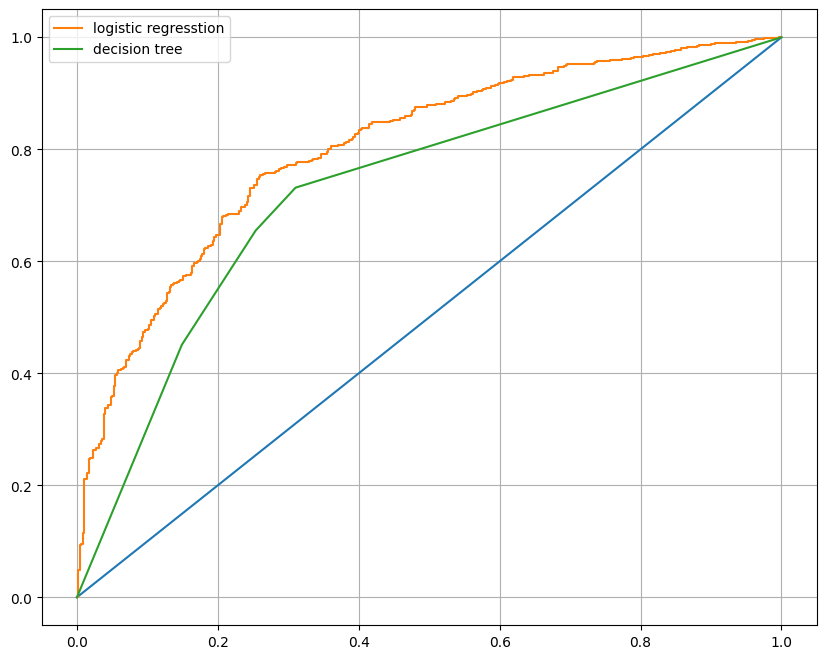

In [21]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1])

for model_name, model in models.items():
    pred = model.predict_proba(te_dt)[:, 1] ## 0일 확률, 1일 확률을 반환
    fpr, tpr , thre = roc_curve(te_lb, pred)
    plt.plot(fpr, tpr, label = model_name)

plt.grid()
plt.legend()
plt.show()

In [19]:
models.items()

dict_items([('logistic regresstion', Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])), ('decision tree', DecisionTreeClassifier(max_depth=2, random_state=13))])